In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# 定数
a = 0
b = 0.5
c = -0.5
d = 0

# 初期値
R0 = 0.5
J0 = 1

# シミュレーションの実行時間
T = 20

# 初期値の配列
initial_conditions = np.array([[0.5, 1], [0.5, 0.5], [-0.5, 1.5], [1.2, -0.3], [0, 0]])
dt = 1e-2
steps = int(T / dt) + 1

In [168]:
# 微分された関数
def dx(x, y):
    return a*x + b*y

def dy(x, y):
    return c*x + d*y


# 解析解をオイラー法で求める関数
def euler(dx, dy, R0, J0, dt, steps):
    """
    連立微分方程式を解く関数

    Prameters:
        dx (function): dR/dtを計算する関数
        dy (function): dJ/dtを計算する関数
        R0, J0 (float): 初期条件
        dt (float): 時間ステップ
        steps (int): 計算ステップ数

    Returns:
        R (list): 時間経過に伴うRの値のリスト
        J (list): 時間経過に伴うJの値のリスト
    """

    R_array = np.zeros(steps)
    J_array = np.zeros(steps)
    R_array[0] = R0
    J_array[0] = J0

    for i in range(1, steps):
        dR_dt = dx(R_array[i-1], J_array[i-1])
        dJ_dt = dy(R_array[i-1], J_array[i-1])
        R_array[i] = R_array[i-1] + dR_dt * dt
        J_array[i] = J_array[i-1] + dJ_dt * dt

    return R_array, J_array


# 解軌道を描画
def plot_trajectory(R0, J0):
    t = np.linspace(-2, T, steps)
    
    R, J = euler(dx, dy, R0, J0, dt, steps)
    plt.plot(t, R, label='R(t)')
    plt.plot(t, J, label='J(t)')
    plt.xlabel('t')
    plt.ylabel("R and J")
    plt.title("trajectory of R and J")
    plt.legend()
    
    plt.show()

# 解析解のペアをプロット
def plot_trajectory_pair(R0, J0):
    
    # 初期値による解析解を求める
    R, J = euler(dx, dy, R0, J0, dt, steps)

    plt.plot(R, J)
    plt.plot(R0, J0, marker='o', markersize=10) # 初期値のみ強調表示
    plt.xlabel('R(t)')
    plt.ylabel('J(t)')
    plt.title("trajectory of (R(t), J(t))")
    
    plt.show() 

# ベクトル場を描画
def plot_vector_field(dx: dx, dy:dy):

    # グリッドの作成
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    dR = dx(X, Y)
    dJ = dy(X, Y)

    plt.quiver(X, Y, dR, dJ, scale=25)
    plt.xlabel('R')
    plt.ylabel('J')
    plt.title(f"vector field")
    plt.grid()
    plt.show()

# 相図の描画をする関数
def plot_phase_field(initial_conditions: np.ndarray, dx, dy):

    # まずベクトル場を表示
    # グリッドの作成
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    dR = dx(X, Y)
    dJ = dy(X, Y)

    plt.quiver(X, Y, dR, dJ, scale=25)
    plt.grid()

    # 複数の初期による解軌道を計算
    # 初期値による解析解を求める
    for i in range(len(initial_conditions)):
        plt.title("phase field")
        R, J = euler(dx, dy, initial_conditions[i][0], initial_conditions[i][1], dt, steps)

        plt.plot(initial_conditions[i][0], initial_conditions[i][1], marker='o') # 初期値のみ強調表示
        plt.plot(R, J) 





[ 0.5         0.505       0.5099875  ... -0.98201189 -0.98496856
 -0.98790067]
[ 1.          0.9975      0.994975   ... -0.59133324 -0.58642318
 -0.58149833]


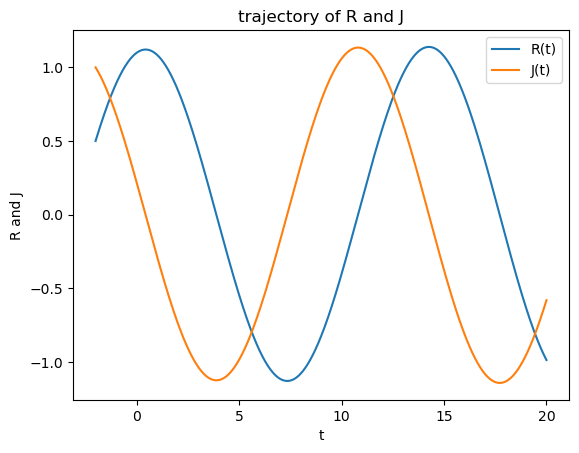

In [169]:
R_result, J_result = euler(dx, dy, R0, J0, dt, steps)
print(R_result)
print(J_result)
plot_trajectory(R0, J0)

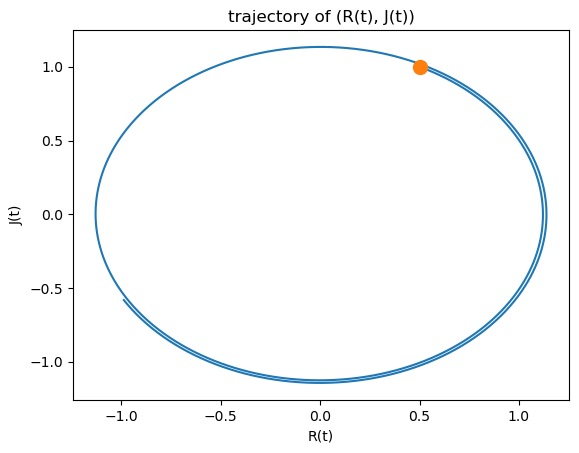

In [170]:
plot_trajectory_pair(R0, J0)

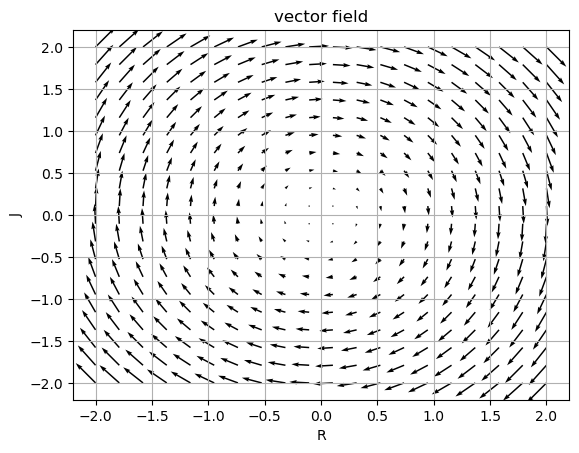

In [171]:
plot_vector_field(dx, dy)

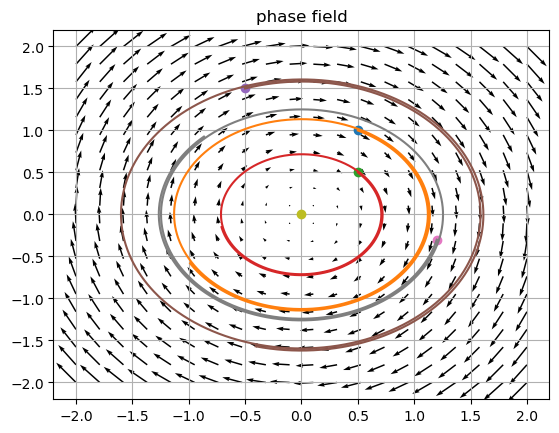

In [172]:
plot_phase_field(initial_conditions, dx, dy)